<h1>UK ROAD ACCIDENT DATA ANALYSIS</h1>
<h2>INCLUSIVE YEAR 2019 - 2022</h2>

<h2>Analyts : Christian Genovana</h2>

<h1>DATA PREPARATION</h1>

<p>Transfer Data set to folder</p>

<h3>Importing Libraries</h3>

In [52]:
import numpy as np
import pandas as pd
import folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

<h1>DATA FRAME</h1>

In [53]:
accident = pd.read_csv('datasets\\accident_data.csv')

In [54]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [55]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [56]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [57]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown road condition')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])

In [58]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [59]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h1>Converting accident date to actual date types</h1>

In [60]:
accident['Accident Date']

0           5/6/2019
1           2/7/2019
2         26-08-2019
3         16-08-2019
4           3/9/2019
             ...    
660674    18-02-2022
660675    21-02-2022
660676    23-02-2022
660677    23-02-2022
660678    28-02-2022
Name: Accident Date, Length: 660679, dtype: object

In [61]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident.dtypes
#remove spaces
accident['Accident Date'] = accident['Accident Date'].str.strip()
#replace / with -
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')


In [62]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [63]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [64]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>Changing to category</h2>

In [65]:
accident['Accident_Severity']=accident['Accident_Severity'].astype('category')

In [66]:
accident['Light_Conditions']=accident['Light_Conditions'].astype('category')

In [67]:
accident['District Area']=accident['District Area'].astype('category')

In [68]:
accident['Number_of_Casualties']=accident['Number_of_Casualties'].astype('category')

In [69]:
accident['Number_of_Vehicles']=accident['Number_of_Vehicles'].astype('category')

In [70]:
accident['Road_Surface_Conditions']=accident['Road_Surface_Conditions'].astype('category')

In [71]:
accident['Road_Type']=accident['Road_Type'].astype('category')

In [72]:
accident['Urban_or_Rural_Area']=accident['Urban_or_Rural_Area'].astype('category')

In [73]:
accident['Weather_Conditions']=accident['Weather_Conditions'].astype('category')

In [74]:
accident['Vehicle_Type']=accident['Vehicle_Type'].astype('category')

In [75]:
accident['Latitude']=accident['Latitude'].astype('category')

In [76]:
accident['Longitude']=accident['Longitude'].astype('category')

In [77]:
accident.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                         category
Light_Conditions                 category
District Area                    category
Longitude                        category
Number_of_Casualties             category
Number_of_Vehicles               category
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [78]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [79]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  category      
 8   Number_of_Vehicles       660679 non-null  category      
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [80]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

<h1>Insight no.1</h1>
<h3>There were more accidents in 2019, followed by 2020, and based on the results, the number of accidents has been decreasing each year.
</h3>

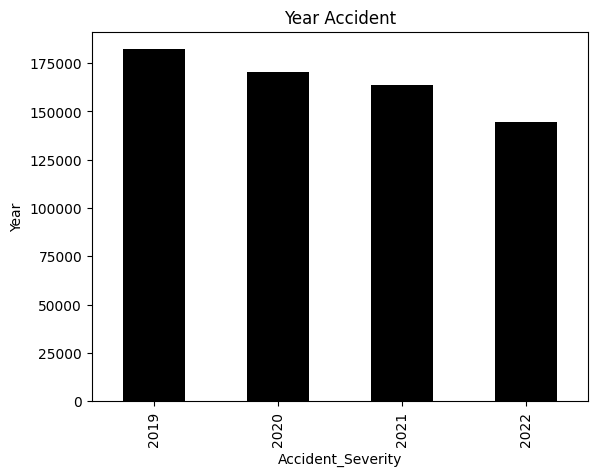

In [81]:
accidents_per_year = accident.groupby('Year')['Accident_Severity'].count().sort_index()

accidents_per_year.plot(kind='bar' , color='black')
plt.title('Year Accident')
plt.ylabel('Year')
plt.xlabel('Accident_Severity')
plt.show()

                             

<h1>Insight no.2</h1>
<h3>Theres no correlation between the number of casualties and number of vehicles</h3>

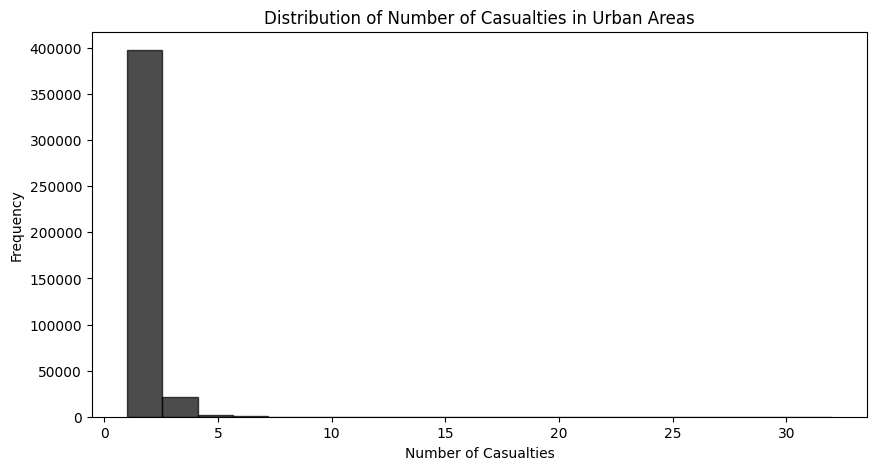

In [129]:
urban_casualties = accident[accident['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties']

plt.figure(figsize=(10, 5))
plt.hist(urban_casualties, bins=20, color='black', edgecolor='black', alpha=0.7)

plt.title('Distribution of Number of Casualties in Urban Areas')
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')

plt.show()

<h1>Insight no.3</h1>
<h3>There's no correlation between urban or Rural area and Number of casualties</h3>

C:\Users\katherine\AppData\Local\Temp\ipykernel_2856\1305996379.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_filtered['Number_of_Casualties'] = pd.to_numeric(accident_filtered['Number_of_Casualties'], errors='coerce')
C:\Users\katherine\AppData\Local\Temp\ipykernel_2856\1305996379.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = accident_filtered.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean().to_frame()


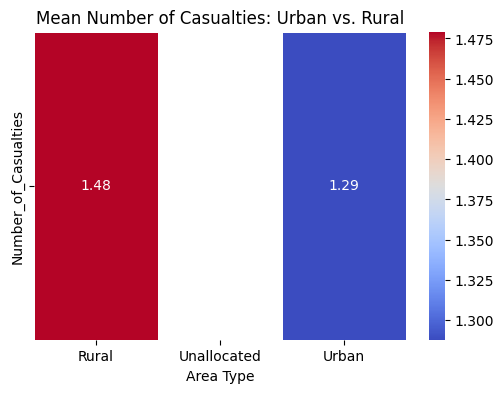

ANOVA p-value: 0.00000


In [130]:
accident_filtered = accident[accident['Urban_or_Rural_Area'].isin(['Urban', 'Rural'])]

accident_filtered['Number_of_Casualties'] = pd.to_numeric(accident_filtered['Number_of_Casualties'], errors='coerce')

heatmap_data = accident_filtered.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean().to_frame()

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data.T, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, cbar=True)

plt.title("Mean Number of Casualties: Urban vs. Rural")
plt.xlabel("Area Type")
plt.ylabel("")

plt.show()

f_stats, p_value = f_oneway(
    accident_filtered[accident_filtered['Urban_or_Rural_Area'] == 'Urban']['Number_of_Casualties'],
    accident_filtered[accident_filtered['Urban_or_Rural_Area'] == 'Rural']['Number_of_Casualties']
)

print(f"ANOVA p-value: {p_value:.5f}")

<h1>Insight no.4</h1>
<h3>Birmingham have the highest number of fatal accidents with 105 reported followed by Leeds with 93 reported then Highland with 88 reported</h3>

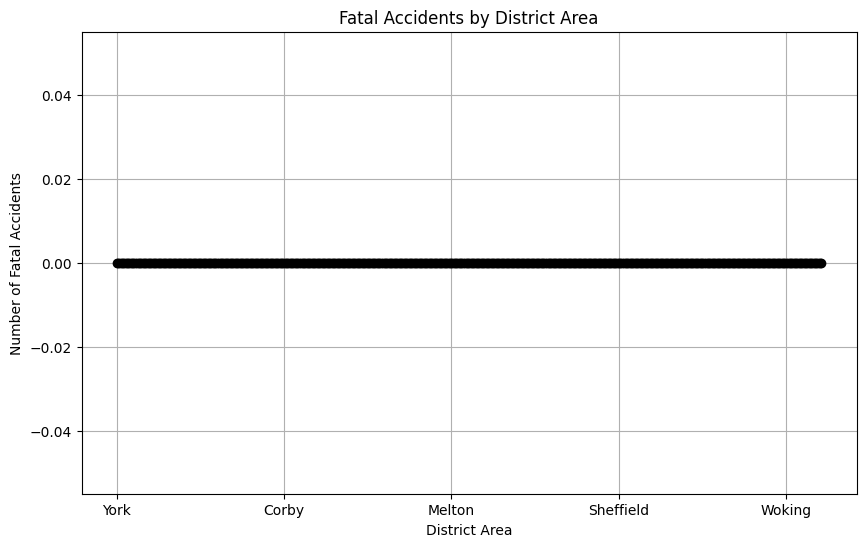

In [140]:
severity_district = accident[accident['Accident_Severity'] == 'fatal']['District Area'].value_counts()

plt.figure(figsize=(10, 6))
severity_district.plot(kind='line', marker='o', color='black') 
plt.title('Fatal Accidents by District Area')
plt.ylabel('Number of Fatal Accidents')
plt.xlabel('District Area')
plt.grid(True)
plt.show()


<h1>Insight no.5</h1>
<h3>Saturday has the highest number of accidents (43,164), followed by Wednesday (40,037) and Friday (39,822)</h3>

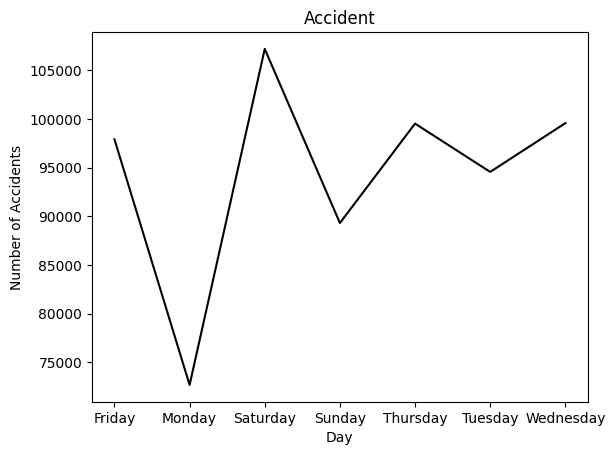

In [141]:
accident_day = accident['Accident Date'].dt.day_name().value_counts().sort_index()
accident_day.plot(kind='line', color='black')
plt.title('Accident')
plt.ylabel('Number of Accidents')
plt.xlabel('Day')
plt.show()

<h1>Insight no.6</h1>
<h3>The proportion of accidents happening on weekdays is 28.27%</h3>

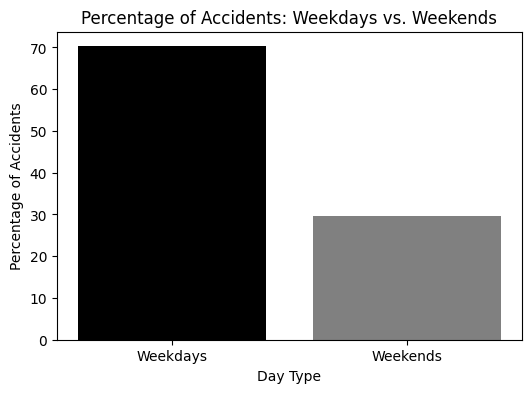

In [35]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'])

weekdays = (accident['Accident Date'].dt.dayofweek < 5).mean() * 100  
weekends = (accident['Accident Date'].dt.dayofweek >= 5).mean() * 100  

accident_percentages = {'Weekdays': weekdays, 'Weekends': weekends}


plt.figure(figsize=(6, 4))
plt.bar(accident_percentages.keys(), accident_percentages.values(), color=['black', 'gray'])


plt.title('Percentage of Accidents: Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Percentage of Accidents')
plt.show()

<h1>Insight no.7</h1>
<h3>The proportion of accidents happening on weekends is 11.84%</h3>

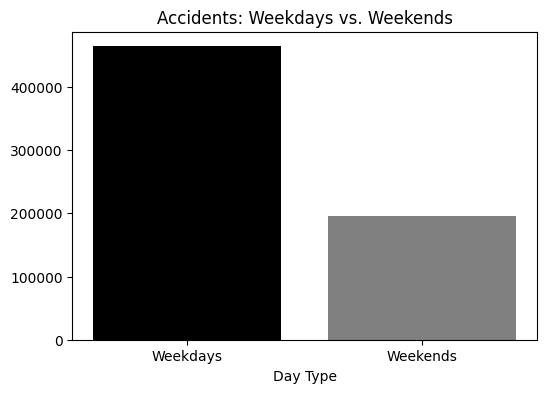

In [36]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'])


weekend_counts = {
    'Weekdays': (accident['Accident Date'].dt.dayofweek < 5).sum(),
    'Weekends': (accident['Accident Date'].dt.dayofweek >= 5).sum()
}

plt.figure(figsize=(6, 4))
plt.bar(weekend_counts.keys(), weekend_counts.values(), color=['black', 'gray'])

plt.title('Accidents: Weekdays vs. Weekends')
plt.xlabel('Day Type')



plt.show()

<h1>Insight no.8</h1>
<h3>Fatal Accidents Occur Most on Dry Roads</h3>

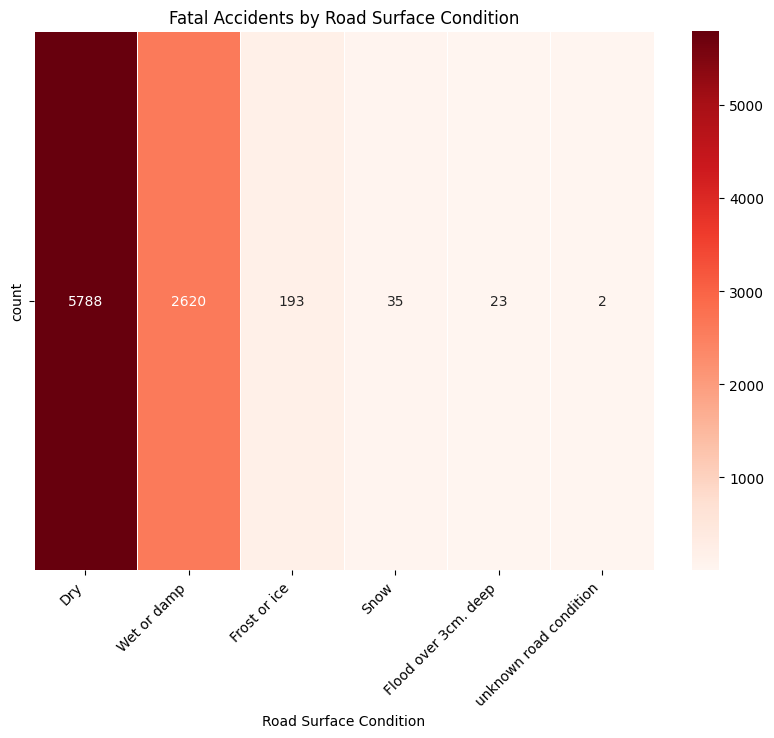

In [145]:

# Kunin ang count ng Fatal Accidents by Road Surface Condition
severity_rtype = accident[accident['Accident_Severity'] == 'Fatal']['Road_Surface_Conditions'].value_counts()

# Convert to DataFrame at i-reshape ito para maging heatmap-friendly
severity_rtype_df = pd.DataFrame(severity_rtype).T  # Transpose para maging row-based

# Plot Heatmap
plt.figure(figsize=(10, 7))  # Adjust height para hindi masyadong stretched
sns.heatmap(severity_rtype_df, cmap="Reds", annot=True, fmt="d", linewidths=0.5)

plt.title('Fatal Accidents by Road Surface Condition')
plt.xlabel('Road Surface Condition')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')

plt.show()

<h1>Insight.9</h1>
<h3>Contrary to popular belief that most accidents happen in darkness or at night time, the majority of accidents—about 74.62% of the total accidents in 2022—happened during daylight.</h3>

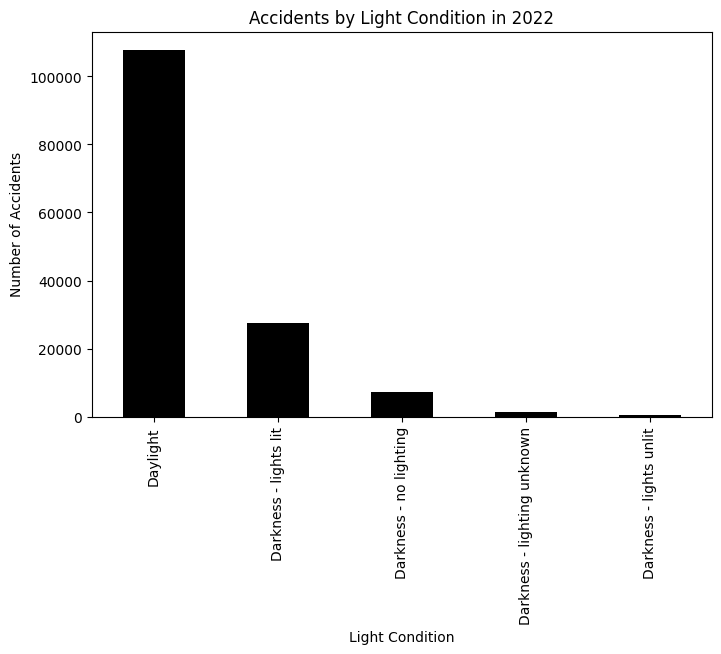

In [38]:
df_2022 = accident[accident['Year'] == 2022]

light_conditions_count = df_2022['Light_Conditions'].value_counts()

plt.figure(figsize=(8, 5))  
light_conditions_count.plot(kind='bar', color='black')

plt.title('Accidents by Light Condition in 2022')
plt.xlabel('Light Condition')
plt.ylabel('Number of Accidents')
 
plt.show()

<h1>Insight no.10</h1>
<h3>85% of car accidents experience a slight status in accident severity, followed by serious accidents.</h3>

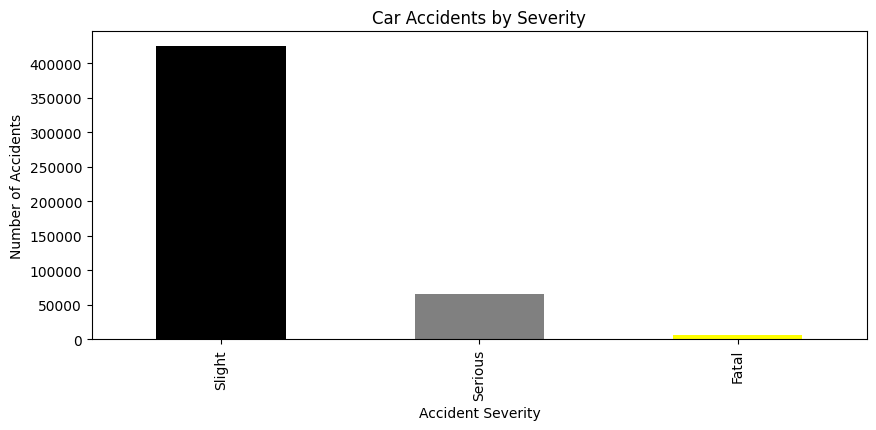

In [39]:
car = accident[accident['Vehicle_Type'] == "Car"]
car_severity_count = car['Accident_Severity'].value_counts()

plt.figure(figsize=(10, 4))  
car_severity_count.plot(kind='bar', color=['black', 'gray', 'yellow'])

plt.title('Car Accidents by Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')

plt.show()

<h1>Insight no.11</h1>
<h3>There is a strong correlation between The road surface condition and the number of vehicles
</h3>

C:\Users\katherine\AppData\Local\Temp\ipykernel_2856\1517478247.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = filtered_data.groupby('Road_Surface_Conditions')['Number_of_Vehicles'].mean().to_frame()


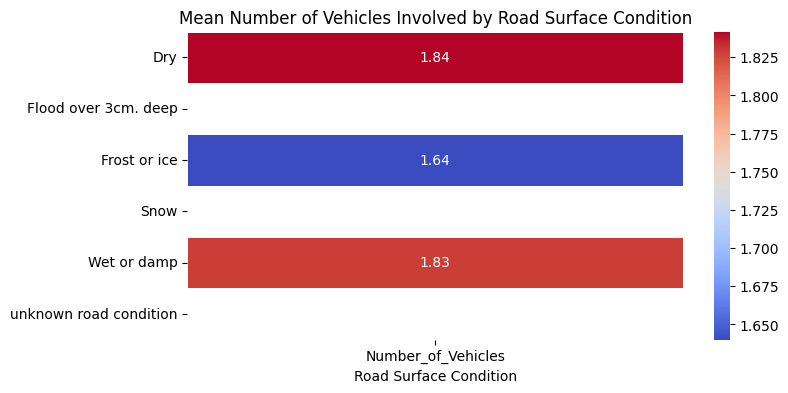

In [125]:
accident['Number_of_Vehicles'] = pd.to_numeric(accident['Number_of_Vehicles'], errors='coerce')

road_conditions = ["Dry", "Frost or ice", "Wet or damp"]
filtered_data = accident[accident['Road_Surface_Conditions'].isin(road_conditions)]

heatmap_data = filtered_data.groupby('Road_Surface_Conditions')['Number_of_Vehicles'].mean().to_frame()

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

plt.title("Mean Number of Vehicles Involved by Road Surface Condition")
plt.xlabel("Road Surface Condition")
plt.ylabel("")

plt.show()

<h1>Insight no.12</h1>
<h3>Urban areas tend to have a higher frequency of accidents, but rural areas often experience more severe crashes due to higher speeds and limited emergency response time. This suggests that while urban accidents are more common, rural accidents may have a greater impact on road safety and fatality rates.</h3>

C:\Users\katherine\AppData\Local\Temp\ipykernel_2856\3484978390.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_distribution = accident.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts(normalize=True).unstack()


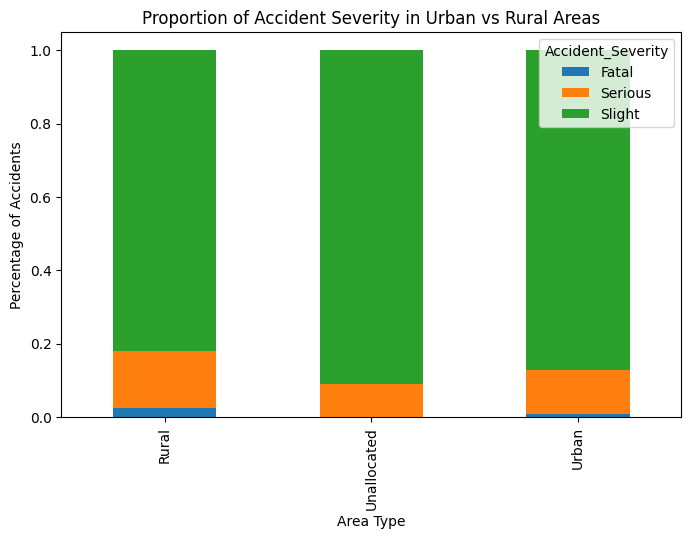

In [41]:
severity_distribution = accident.groupby('Urban_or_Rural_Area')['Accident_Severity'].value_counts(normalize=True).unstack()

severity_distribution.plot(kind='bar', stacked=True, figsize=(8, 5))

plt.title("Proportion of Accident Severity in Urban vs Rural Areas")
plt.xlabel("Area Type")
plt.ylabel("Percentage of Accidents")

plt.show()

<h1>Insight no.13</h1>
<h3>Motorcycles and bicycles tend to have a higher proportion of serious or fatal accidents due to lack of external protection and higher vulnerability in crashes.
</h3>

C:\Users\katherine\AppData\Local\Temp\ipykernel_2856\923573014.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_by_vehicle = accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts().unstack()


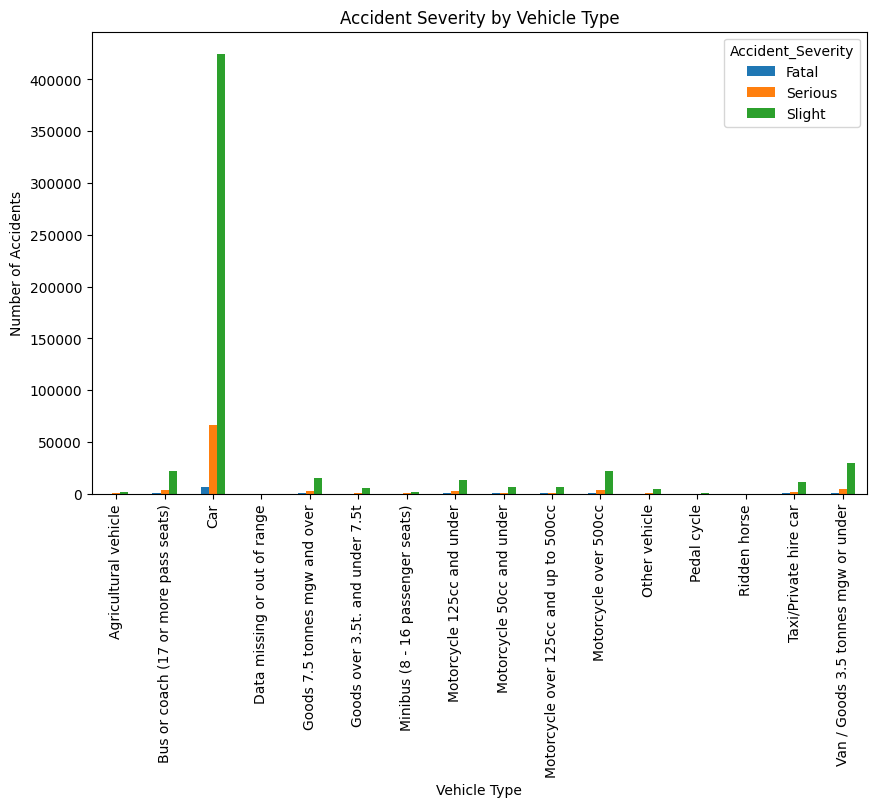

In [42]:
severity_by_vehicle = accident.groupby('Vehicle_Type')['Accident_Severity'].value_counts().unstack()

severity_by_vehicle.plot(kind='bar', figsize=(10, 6))

plt.title("Accident Severity by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")

plt.show()

<h1>Insight no.14</h1>
<h3>Accidents on wet or icy roads may be more severe because vehicles take longer to stop and lose control more easily.</h3>

C:\Users\katherine\AppData\Local\Temp\ipykernel_2856\1246073409.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_by_surface = accident.groupby('Road_Surface_Conditions')['Accident_Severity'].value_counts().unstack()


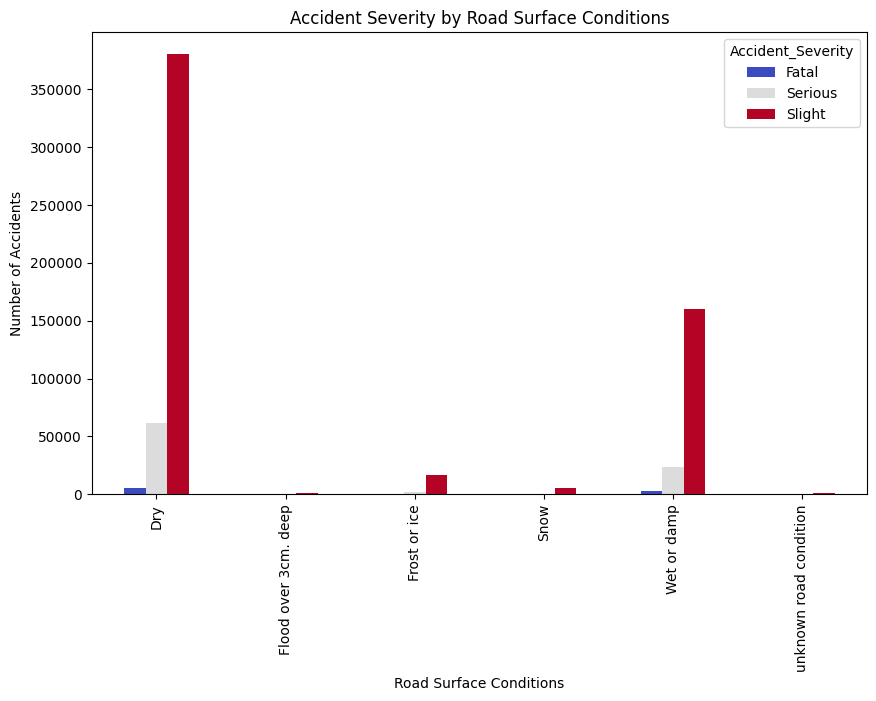

In [43]:
severity_by_surface = accident.groupby('Road_Surface_Conditions')['Accident_Severity'].value_counts().unstack()

severity_by_surface.plot(kind='bar', figsize=(10, 6), colormap="coolwarm")

plt.title("Accident Severity by Road Surface Conditions")
plt.xlabel("Road Surface Conditions")
plt.ylabel("Number of Accidents")

plt.show()

<h1>Insight No. 15</h1>
<h3>Most accidents occur in "Fine no high winds" conditions with 441,739 slight, 72,046 serious, 7,100 fatal accidents reported</h3>

C:\Users\katherine\AppData\Local\Temp\ipykernel_2856\1123336775.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_weather = accident.groupby('Weather_Conditions')['Accident_Severity'].value_counts().unstack()


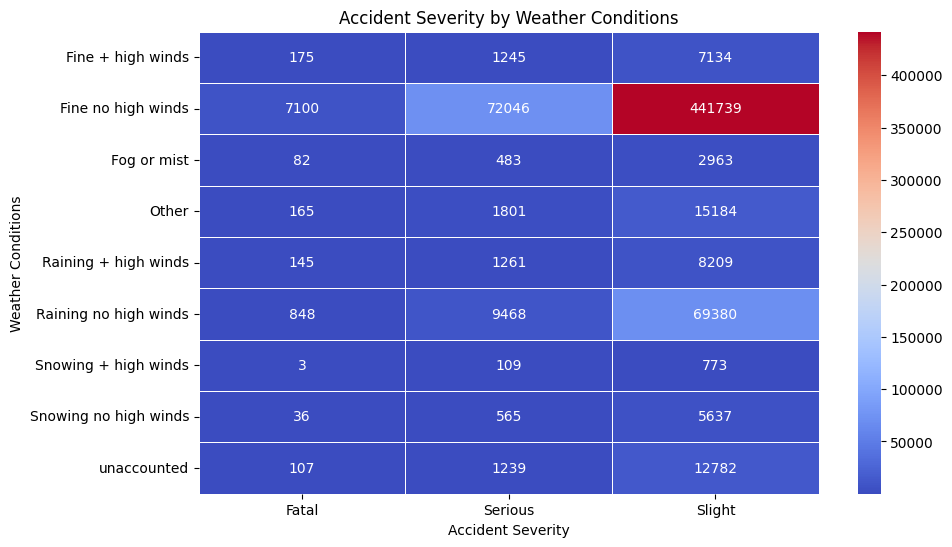

In [127]:
severity_weather = accident.groupby('Weather_Conditions')['Accident_Severity'].value_counts().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(severity_weather, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Accident Severity by Weather Conditions")
plt.xlabel("Accident Severity")
plt.ylabel("Weather Conditions")

plt.show()

<h1>Insight no.16</h1>
<h3>Motorcycles and bicycles may peak in summer (June-August) due to good weather.
Heavy vehicles (trucks, buses) may have steady numbers year-round because of commercial activity.
Private cars may increase during holidays (December, July, August) due to vacation trips.</h3>

C:\Users\katherine\AppData\Local\Temp\ipykernel_2856\614465747.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_seasonal = accident.groupby(['Month', 'Vehicle_Type']).size().unstack().fillna(0)


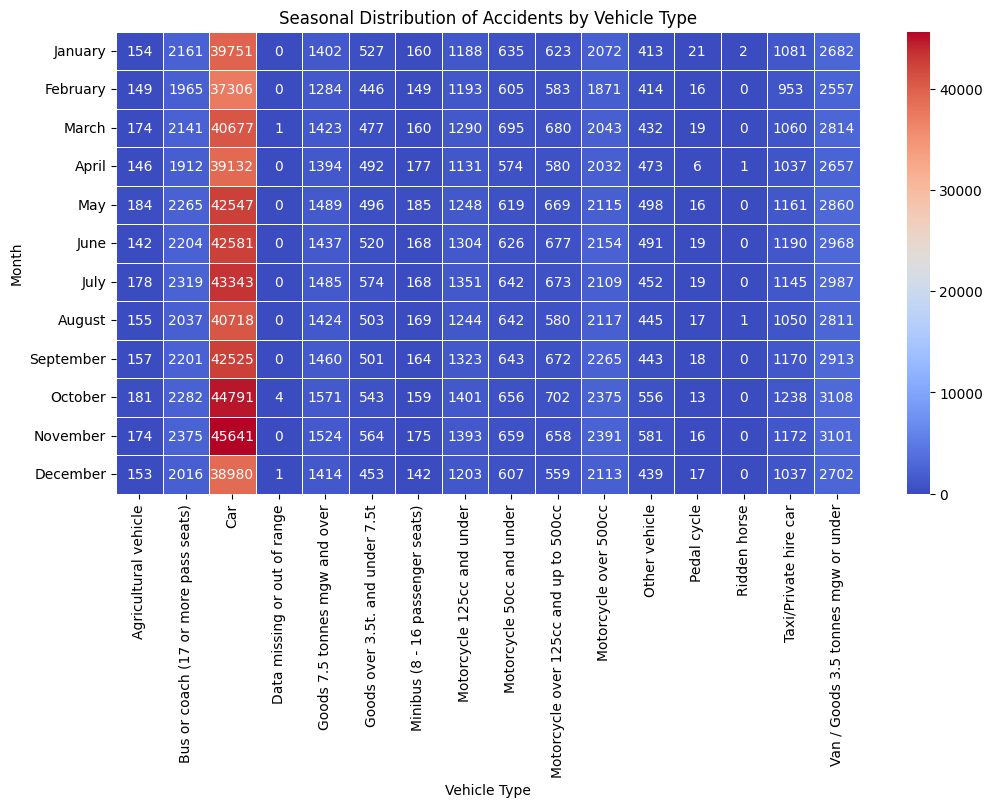

In [120]:
vehicle_seasonal = accident.groupby(['Month', 'Vehicle_Type']).size().unstack().fillna(0)

month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

vehicle_seasonal = vehicle_seasonal.reindex(month_order)

plt.figure(figsize=(12, 6))
sns.heatmap(vehicle_seasonal, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Seasonal Distribution of Accidents by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Month")

plt.show()

<h1>Insight no.17</h1>
<h3>Saturday has the highest number of accidents (43,164), followed by Wednesday (40,037) and Friday (39,822)</h3>

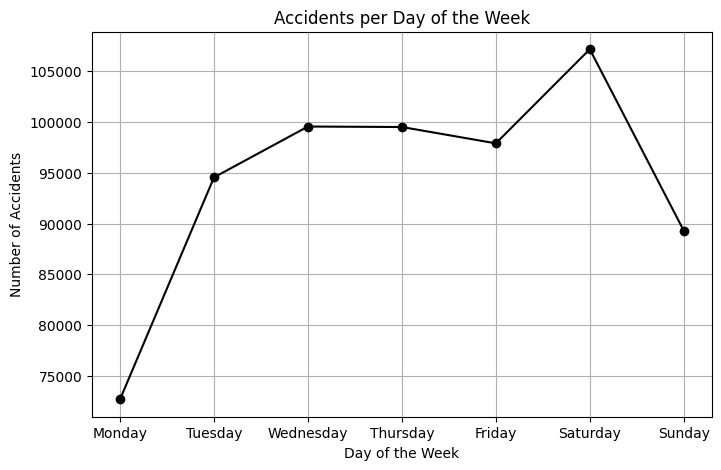

In [115]:
accident_day = accident['Accident Date'].dt.day_name().value_counts()

week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

accident_day = accident_day.reindex(week_order)

plt.figure(figsize=(8, 5))
plt.plot(accident_day.index, accident_day.values, marker='o', linestyle='-', color='black')

plt.title("Accidents per Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.grid(True)

plt.show()

<h1>Insight no.18</h1>
<h3>Motorcycles and bicycles may have fewer night-time incidents, as riders avoid poor visibility conditions.
Taxis and private hire cars may have higher numbers at night, reflecting nightlife travel.
</h3>

C:\Users\katherine\AppData\Local\Temp\ipykernel_2856\2942523828.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  light_vehicle = accident.groupby(['Light_Conditions', 'Vehicle_Type']).size().unstack()


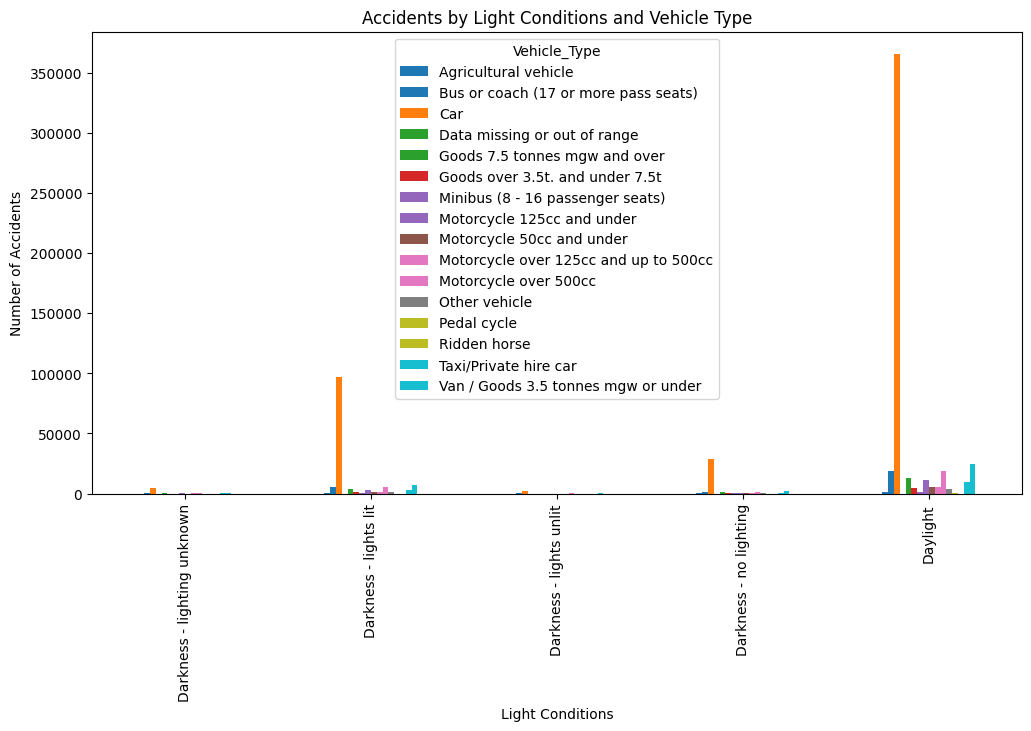

In [48]:
light_vehicle = accident.groupby(['Light_Conditions', 'Vehicle_Type']).size().unstack()

light_vehicle.plot(kind='bar', figsize=(12,6), colormap='tab10')

plt.title("Accidents by Light Conditions and Vehicle Type")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")

plt.show()


<h1>Insight no.19</h1>

<h3>Single carriageways have the highest number of accidents with 415,557 slight, 70,059 serious, and 6,527 fatal accidents reported</h3>

C:\Users\katherine\AppData\Local\Temp\ipykernel_2856\3081502680.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rtype_severity = accident.groupby('Road_Type')['Accident_Severity'].value_counts().unstack()


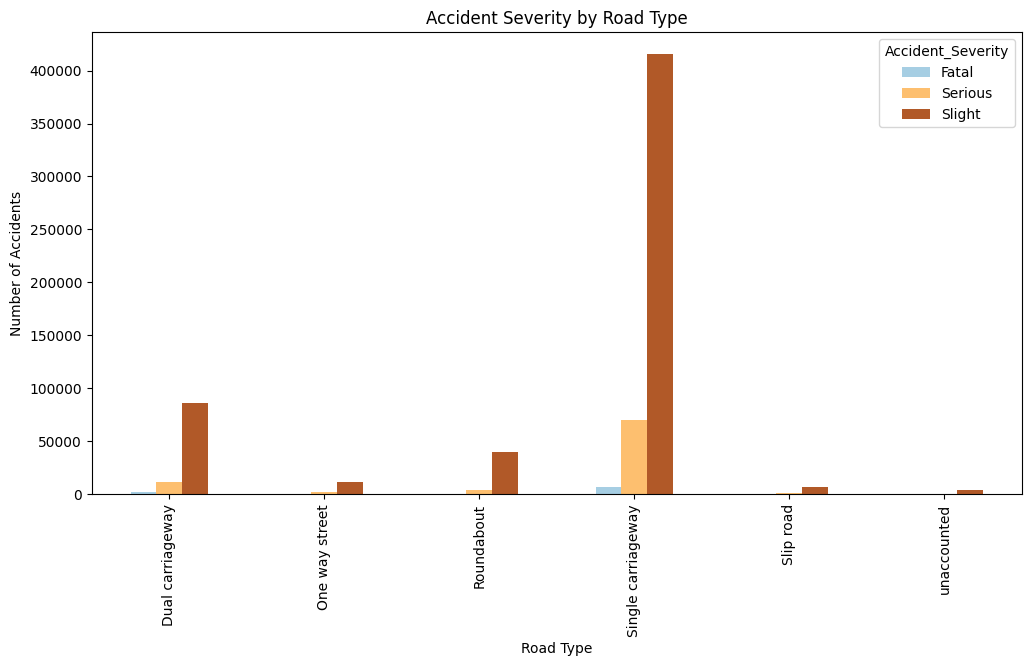

In [49]:
rtype_severity = accident.groupby('Road_Type')['Accident_Severity'].value_counts().unstack()

rtype_severity.plot(kind='bar', figsize=(12,6), colormap='Paired')

plt.title("Accident Severity by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")

plt.show()

<h1>Insight no.20</h1>
<h3>The highest accident count (45) occurs at latitude 52.949719, longitude -0.977611</h3>

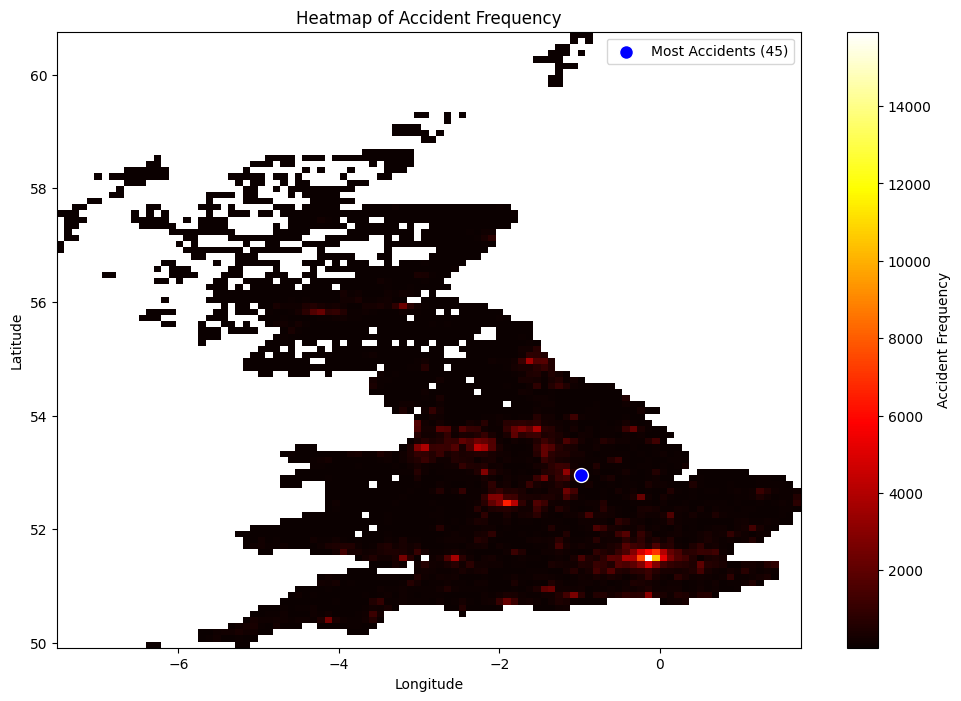

In [109]:
latitudes = accident['Latitude'].values
longitudes = accident['Longitude'].values

high_acc_lat, high_acc_lon = 52.949719, -0.977611

plt.figure(figsize=(12, 8))
plt.hist2d(longitudes, latitudes, bins=(100, 100), cmap='hot', cmin=1)
plt.colorbar(label='Accident Frequency')

plt.scatter(high_acc_lon, high_acc_lat, color='blue', edgecolors='white', s=100, label="Most Accidents (45)")
plt.legend()

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Accident Frequency')

plt.show()